In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ppt



#### Reading the dataset

In [2]:
data1 = pd.read_csv('ufc_event_data.csv')

#### What does the dataset looks like?

In [3]:
data1.head()

,event_id,event_name,event_date,event_city,event_state,event_country,event_url
0,665,UFC Fight Night: Dawson vs. Green,2023-10-07,Las Vegas,Nevada,USA,http://ufcstats.com/event-details/c8a49ff2acb6...
1,664,UFC Fight Night: Fiziev vs. Gamrot,2023-09-23,Las Vegas,Nevada,USA,http://ufcstats.com/event-details/c945adc22c2b...
2,663,UFC Fight Night: Grasso vs. Shevchenko 2,2023-09-16,Las Vegas,Nevada,USA,http://ufcstats.com/event-details/8fa2b0657236...
3,662,UFC 293: Adesanya vs. Strickland,2023-09-09,Sydney,New South Wales,Australia,http://ufcstats.com/event-details/ece280745f87...
4,661,UFC Fight Night: Gane vs. Spivac,2023-09-02,Paris,Ile-de-France,France,http://ufcstats.com/event-details/ef61d9f5176b...


#### Columns

In [4]:
data1.columns

Index(['event_id', 'event_name', 'event_date', 'event_city', 'event_state',
       'event_country', 'event_url'],
      dtype='object')

#### Removing column 'event_url'

In [5]:
data1.drop(columns=['event_url'], inplace=True)

#### Renaming the columns for better presentation

In [6]:
data1.rename(columns={'event_id':'ID', 
                      'event_name':'Name', 
                      'event_date':'Date', 
                      'event_city':'City', 
                      'event_state':'State', 
                      'event_country':'Country'},
             inplace=True)

#### Descriptive Analysis

In [7]:
#info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       665 non-null    int64 
 1   Name     665 non-null    object
 2   Date     665 non-null    object
 3   City     665 non-null    object
 4   State    616 non-null    object
 5   Country  665 non-null    object
dtypes: int64(1), object(5)
memory usage: 31.3+ KB


In [8]:
#size (number of cells)
data1.size

3990

In [9]:
#shape (rows x columns)
data1.shape

(665, 6)

In [10]:
#statistics (for numerical columns)
# but this is USELESS
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,665.0,333.0,192.113248,1.0,167.0,333.0,499.0,665.0


#### Cleaning, Finding and Filling the missing data

In [11]:
#info
data1.isnull().sum()

ID          0
Name        0
Date        0
City        0
State      49
Country     0
dtype: int64

#### As per above results, 49 cells of 'State' have NaN values. <br>These may generate error during analysis

Either you DROP

In [12]:
data1.State.dropna()

0               Nevada
1               Nevada
2               Nevada
3      New South Wales
4        Ile-de-France
            ...       
660            Wyoming
661     North Carolina
662           Oklahoma
663     North Carolina
664           Colorado
Name: State, Length: 616, dtype: object

Else you FILL

In [13]:
data1.State.fillna('Unknown')

0               Nevada
1               Nevada
2               Nevada
3      New South Wales
4        Ile-de-France
            ...       
660            Wyoming
661     North Carolina
662           Oklahoma
663     North Carolina
664           Colorado
Name: State, Length: 665, dtype: object

#### Since dropping takes the number of rows from 665 to 616 which is less than 10% data loss. <br> <i> Therefore the rows can be DROPPED </i>

In [14]:
data1.dropna(inplace=True)

#### Listing Unique Events and their occurence.

In [15]:
len(data1.Name.unique())

616

616 unique events can't be visualized.

In [16]:
len(data1.Date.unique())

615

615 unique dates can't be visualized.

In [17]:
len(data1.City.unique())

143

Again, 143 events can't be visualized but the places that hosted the most.

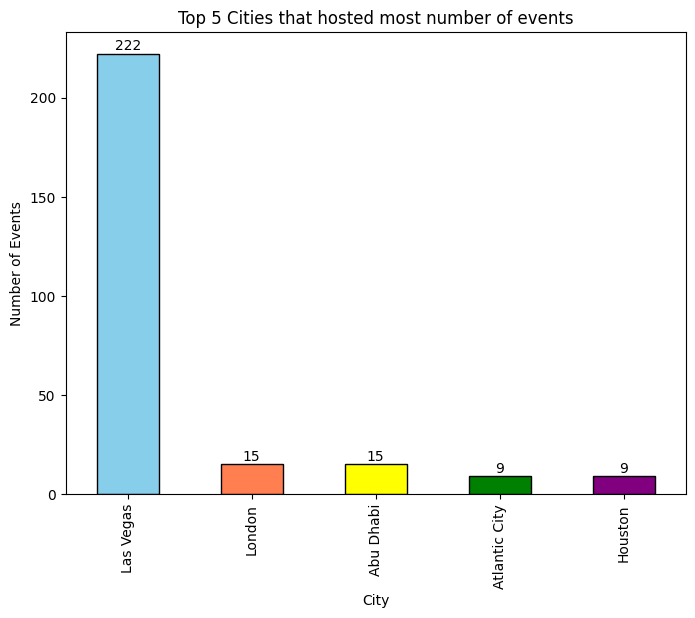

In [18]:
top=5
data_plot = data1.City.value_counts().head(top)
data_plot.plot(kind='bar', figsize=(8,6), color=['skyblue', 'coral', 'yellow', 'green', 'purple'], edgecolor='black')
plt.ylabel("Number of Events")
plt.title(f'Top {top} Cities that hosted most number of events')

for i, value in enumerate(data_plot):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

#### Similarily for STATES and COUNTRY

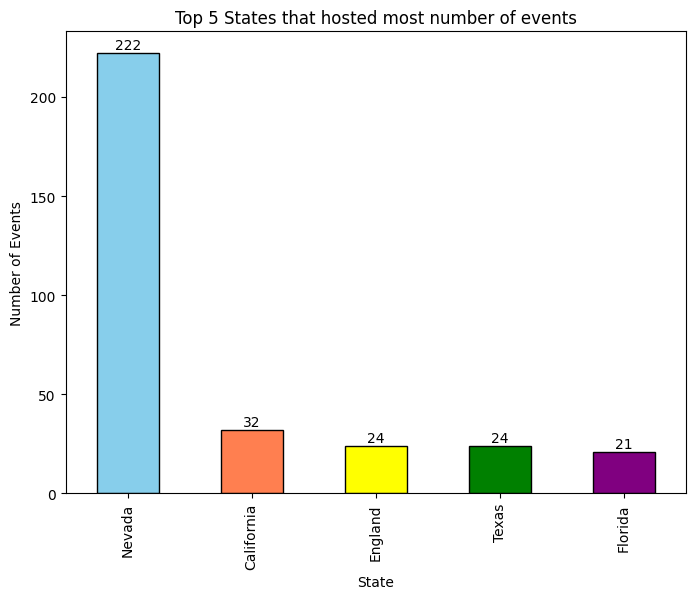

In [19]:
top=5
data_plot = data1.State.value_counts().head(top)
data_plot.plot(kind='bar', figsize=(8,6), color=['skyblue', 'coral', 'yellow', 'green', 'purple'], edgecolor='black')
plt.ylabel("Number of Events")
plt.title(f'Top {top} States that hosted most number of events')
for i, value in enumerate(data_plot):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

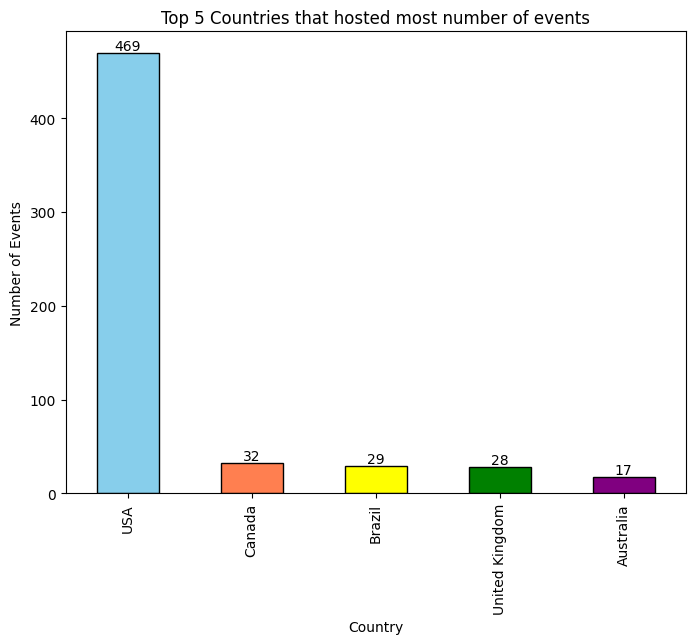

In [20]:
top=5
data_plot = data1.Country.value_counts().head(top)
data_plot.plot(kind='bar', figsize=(8,6), color=['skyblue', 'coral', 'yellow', 'green', 'purple'], edgecolor='black')
plt.ylabel("Number of Events")
plt.title(f'Top {top} Countries that hosted most number of events')

for i, value in enumerate(data_plot):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

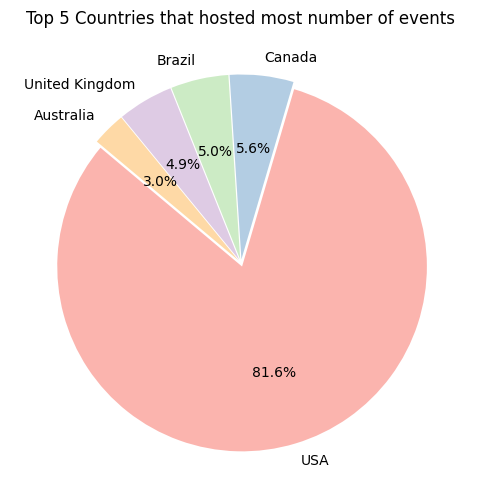

In [21]:
top = 5
data_plot = data1.Country.value_counts().head(top)

plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f%%', colors=plt.get_cmap('Pastel1').colors, startangle=140, explode=[0.02]*len(data_plot))
plt.title(f'Top {top} Countries that hosted most number of events')

plt.show()


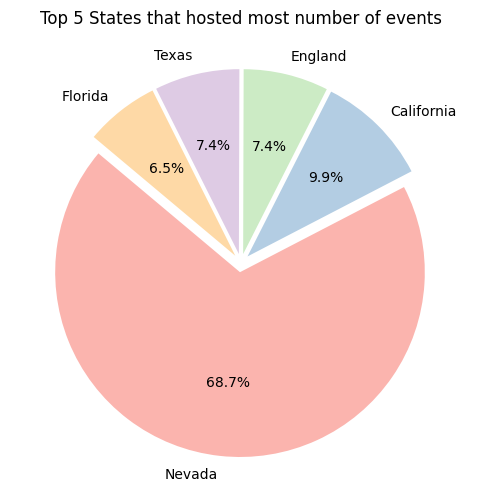

In [22]:
top = 5
data_plot = data1.State.value_counts().head(top)

plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f%%', colors=plt.get_cmap('Pastel1').colors, startangle=140, explode=[0.05]*len(data_plot))
plt.title(f'Top {top} States that hosted most number of events')

plt.show()


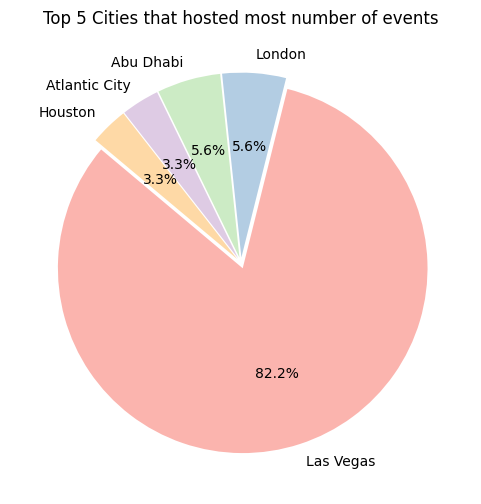

In [23]:
top = 5
data_plot = data1.City.value_counts().head(top)

plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f%%', colors=plt.get_cmap('Pastel1').colors, startangle=140, explode=[0.03]*len(data_plot))
plt.title(f'Top {top} Cities that hosted most number of events')

plt.show()


In [24]:
ufc = int(data1.Name.value_counts().sum())
x = ['Fight Night', 'on FOX', 'UFC']
fight = data1['Name'].str.contains('Fight Night').sum()
fox = data1['Name'].str.contains('on FOX').sum()
y = [fight, fox, ufc-(fight+fox)]

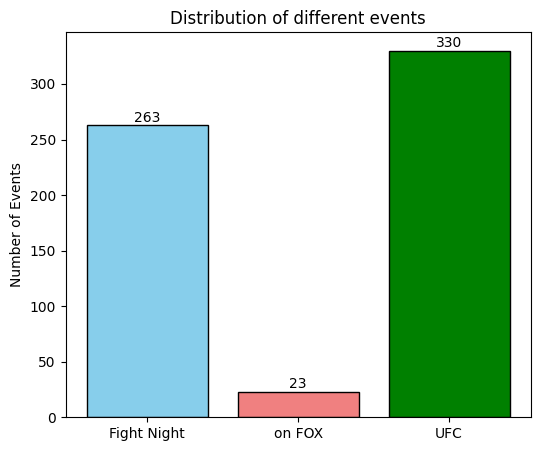

In [25]:
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
plt.bar(x, y, color=['skyblue', 'lightcoral', 'green'], edgecolor='black')
plt.ylabel("Number of Events")
plt.title('Distribution of different events')

for i, value in enumerate(y):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

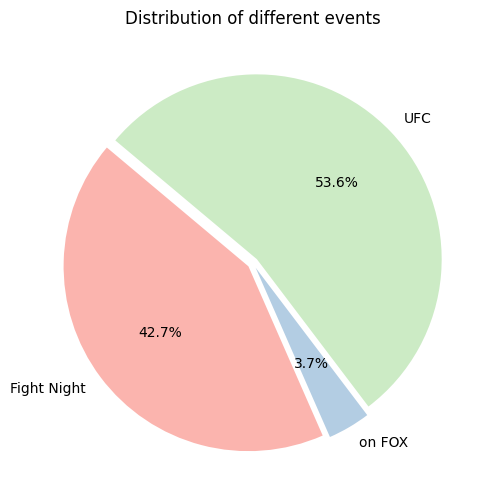

In [26]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(y, labels=x, autopct='%1.1f%%', colors=plt.get_cmap('Pastel1').colors, startangle=140, explode=[0.03]*len(y))
plt.title('Distribution of different events')

plt.show()
